<font color=darkred>

# Soc220: Computational Text Analysis
## Lab 6 (Week 7): A brief tour of some ML classification algorithms

<br>

<img src="images/chart.png" alt="Drawing" style="width: 800px;"/>


Today:

- Document-term matrix
- A very brief introduction to machine learning
- Logistic Regression
- Naive Bayes
- Support Vector Mechanisms
- Plus: TSNE to visualize, AUC, and confusion matrices.

***
    3/7/2018

### Document-term matrix

<font color=darkgreen>

#### Document-term matrix is the most common numeric representation of text.

<img src="images/count_vector.png" alt="Drawing" style="width: 400px;"/>

***

* However, this will overweight words that may not be of interest. To reiterate our intuition from last week: we want to calculate words of *analytic interest."
* A common weighting scheme is tf-IDF

For term i in document j:

### $$w_{i,j} = tf_{i,j} * \log(\frac{N}{df_i})$$

* "term frequency" = how frequently a word occurs in a document, that is, the number of times a word appears in a document.
* "inverse document frequency" = how important a word is, log of total number of documents over the number of documents which contain term i.
* Quick reminder: $\log(1) = 0 $
* Intuition for bag of words now maybe makes sense.

***

<img src="images/tfidf_fig2.JPG" alt="Drawing" style="width: 400px;">
***
***

In [1]:
import pandas
from sklearn.feature_extraction.text import CountVectorizer
countvec = CountVectorizer()

dubois_text_list = ['The problem of the twentieth century is the problem of the color line.', 
'The cost of liberty is less than the price of repression.',
'To be a poor man is hard, but to be a poor race in a land of dollars is the very bottom of hardships.', 
'Believe in life! Always human beings will live and progress to greater, broader, and fuller life.']

dtm_df = pandas.DataFrame(countvec.fit_transform(dubois_text_list).toarray(), columns=countvec.get_feature_names())
dtm_df.astype(bool) #change the type in cell to boolean
dtm_df

,always,and,be,beings,believe,bottom,broader,but,century,color,...,problem,progress,race,repression,than,the,to,twentieth,very,will
0,0,0,0,0,0,0,0,0,1,1,...,2,0,0,0,0,4,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,2,0,0,0,0
2,0,0,2,0,0,1,0,1,0,0,...,0,0,1,0,0,1,2,0,1,0
3,1,2,0,1,1,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,1


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfvec = TfidfVectorizer()

dtm_df = pandas.DataFrame(tfidfvec.fit_transform(dubois_text_list).toarray(), columns=tfidfvec.get_feature_names())
dtm_df.astype(bool) #change the type in cell to boolean
dtm_df

,always,and,be,beings,believe,bottom,broader,but,century,color,...,problem,progress,race,repression,than,the,to,twentieth,very,will
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.245769,0.245769,...,0.491538,0.000000,0.000000,0.000000,0.000000,0.627485,0.000000,0.245769,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.321633,0.321633,0.410589,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.410178,0.000000,0.000000,0.205089,0.000000,0.205089,0.000000,0.000000,...,0.000000,0.000000,0.205089,0.000000,0.000000,0.130906,0.323389,0.000000,0.205089,0.000000
3,0.227962,0.455923,0.000000,0.227962,0.227962,0.000000,0.227962,0.000000,0.000000,0.000000,...,0.000000,0.227962,0.000000,0.000000,0.000000,0.000000,0.179727,0.000000,0.000000,0.227962


### A very brief introduction to the intuition behind machine learning.



#### $$y = \beta_0 + \beta_1 X + \beta_2 X + \epsilon $$

<img src="images/esl1.png" style="width: 500px;"/>


<font color=darkgreen>

#### Big idea: prediction instead of inference or estimation.


* When we solve linear regression in the usual way, we're fitting a line $\hat(y)$ that is orthogonal to the span of $x_1$ and $x_2$
* Geometrically: we're finding the line that's the closet from y to the hyperplane between our Xs. That's the least square prediction.
* In social science context: all the action is on the values of the dependent variables.
* In ML: there is no "error term", there is a loss function, and there are no chosen Xs to estimate -- there is the model space.
* Rather than "here is my regression equation, estimate it for me" instead, "here is my outcome variable, find the optimal regression equation for me so I can predict the next incoming data point, $y_{n+1}$."
* Or rather, predict on a test set from an algorithm trained on the training data.
* Rather than reporting regression coefficients, we'll report accuracy scores: how consistently do we accurately estimate each dimension correctly.

What does this mean practically:

* If sociology doctorates awarded in the US reliably predicts world-wide space launches, then the algorithm is **going to include sociology doctorates awarded as a covariate.**
* scikit-learn, the main data science Python library, *has no way to report coefficient estimates!*

#### Load some data from the Old Bailey Online

In [3]:
frommaster_trials = [trial.strip() for trial in open("data/theft-stealingfrommaster.txt")]
pickpocket_trials = [trial.strip() for trial in open("data/theft-pocketpicking.txt")]

In [4]:
len(frommaster_trials)

2431

In [5]:
len(pickpocket_trials)

2884

In [6]:
import pandas as pd

#transform and concat these lists into a Pandas dataframe
df1 = pd.DataFrame(frommaster_trials, columns = ['trial_text'])
df1['label'] = "master"
df2 = pd.DataFrame(pickpocket_trials, columns = ['trial_text'])
df2['label'] = "pickpocket"
#stick together, n.b. ingnore_index must be turned on.
df = pd.concat([df1,df2],ignore_index = True)

In [7]:
df.describe()

,trial_text,label
count,5315,5315
unique,5315,2
top,t18330411-82 753 HENRY BROWN was indicted for...,pickpocket
freq,1,2884


In [8]:
#check the top of the df
df.label.describe()

count           5315
unique             2
top       pickpocket
freq            2884
Name: label, dtype: object

In [9]:
# first 18 characters are trash, delete them.
sample = df.iloc[0,0]
sample[:18]
#reminder: map applies a function to a vector
df['trial_text'] = df['trial_text'].map(lambda x: str(x)[18:])

In [10]:
df.head()

,trial_text,label
0,JOHN CHILD was indicted for stealing on the 2...,master
1,ISABELLA LAWSON was indicted for stealing on ...,master
2,CHARLOTTE ATKINS was indicted for stealing on...,master
3,JANE RAWLINS was indicted for stealing on the...,master
4,JOHN GRAY was indicted for stealing on the 1s...,master


In [11]:
#!pip install yellowbrick

#### Let's see how well separated our documents.

https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding

In [12]:
#using a TfidfVect that is requiring a minimal frequency plus removing stop words
tfidf  = TfidfVectorizer(min_df=2,  stop_words='english')
texts   = tfidf.fit_transform(df.trial_text)

#infuriating error code: "Pd.series not unqiue"; hack fix: exit pandas to a list.
labels = df['label'].tolist()

In [13]:
from yellowbrick.text import TSNEVisualizer

tsne = TSNEVisualizer(classes=['pickpocket', 'master'])
tsne.fit(texts,labels)

TSNEVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1125f9b70>,
        classes=None, colormap=None, colors=None, decompose=None,
        decompose_by=None)

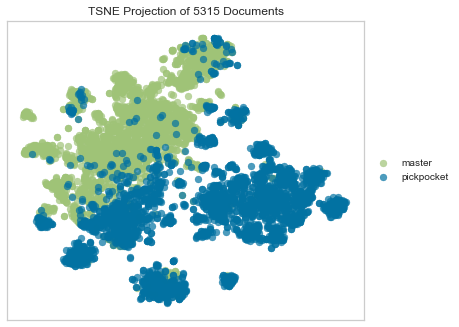

In [14]:
tsne.poof()

In [15]:
# in order to have the same number of 'covariates', we need to build a vocab list from the "full" set of documents,
#which we will then subset when we split training and test
full_vocab = tfidfvec.get_feature_names()
tfidf  = TfidfVectorizer(min_df=.0025, stop_words='english',vocabulary=full_vocab)

In [16]:
import numpy as np

#split the data into test and training
np.random.seed(1550)
#select 75% of data as the training data
markers = np.random.rand(len(df)) < 0.75
df_train = df[markers]
df_test = df[~markers]

In [17]:
#tfidf vectorize:
X_train = tfidf.fit_transform(df_train['trial_text'])
X_test = tfidf.fit_transform(df_test['trial_text'])

In [18]:
#data check of test shape
X_train.shape

(4059, 39)

In [19]:
X_test.shape

(1256, 39)

In [20]:
X_train

<4059x39 sparse matrix of type '<class 'numpy.float64'>'
	with 4840 stored elements in Compressed Sparse Row format>

In [21]:
X_test

<1256x39 sparse matrix of type '<class 'numpy.float64'>'
	with 1511 stored elements in Compressed Sparse Row format>

In [22]:
#encoding our dependent variable as a binary outcome (1 for being a master vs 0 for pickpocket)
y_train = pd.get_dummies(df_train['label'])['master']
y_test = pd.get_dummies(df_test['label'])['master']

In [23]:
# data check that we have correctly gotten our y_variable
y_train.describe()

count    4059.000000
mean        0.462922
std         0.498685
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: master, dtype: float64

In [24]:
y_test.describe()

count    1256.000000
mean        0.439490
std         0.496523
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: master, dtype: float64

<font color=darkred>

#### !! Always double check that your data has the right shape because this can create all sorts of issues. !!

<font color=darkblue>

#### Model selection: confusion matrix and ROC/AUC curves

- A confusion matrix reports the false negative and false positive rate for various parameters.
- The ROCAUC (Receiver Operating Characteristic/Area Under the Curve) visualizes the trade-off between sensitivity (also called recall) which is the true positive rate, and specificity which is the true negative rate.

http://www.scikit-yb.org/en/latest/api/classifier/confusion_matrix.html

http://www.scikit-yb.org/en/latest/api/classifier/rocauc.html

<font color=darkblue>

#### The structure of all sklearn functions:

- import the function:

`from sklearn.function_sub_library import function`
- fit the function:

`function.fit(X,y)`

- Compare the accuracy of the predicted y to the test y -- how often does this get the classification right?

### Logistic regression

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Recall: regression for a binary outcome.

In order to bound a X into [0,1] we use a log-link function:

#### $$P(Y = 1) = \frac{e^{\beta_0+\beta_{1}X}}{1+e^{\beta_0+\beta_{1}X}}$$

or, the more intuitive log-odds expression:

#### $$\ln(\frac{P(Y=1)}{1-P(Y=1)}) = \beta_0+\beta_{1}X $$

In english: a one unit change in X is associated with a $e^{\beta_1}$ chage in the odds that Y = 1. This is a non-linear relationship, but the underlying data *before* the transformation should have something like a linear relation to the outcome (but our outcome is binary, not a continous variable, hence the need for the transformation).

<img src="images/log_plots.png" style="width: 400px;" />

In [25]:
#import
from sklearn.linear_model import LogisticRegression

#fit
logregcv = LogisticRegression()
logregcv.fit(X_train, y_train)

#predict on test set
y_hat_test = logregcv.predict(X_test)
y_hat_train = logregcv.predict(X_train)

<font color=darkgreen>

Results

In [26]:
import sklearn.metrics as metrics

#print model performance
print("Train accuracy: ", metrics.accuracy_score(y_train, y_hat_train))
print("Test accuracy: ", metrics.accuracy_score(y_test, y_hat_test))

Train accuracy:  0.6112342941611234
Test accuracy:  0.6050955414012739


In [27]:
#classification report if yellowbrick is acting up

#Precision = TP/(TP+FP)
#Recall = TP/(TP+FN)
#f1-score = harmonic average of precision and recall

#from sklearn.metrics import classification_report
#y_true, y_pred = y_test, logregcv.predict(X_test)
#print(classification_report(y_true, y_pred))

<font color=darkgreen>

#### Visualizing the confusion matrix

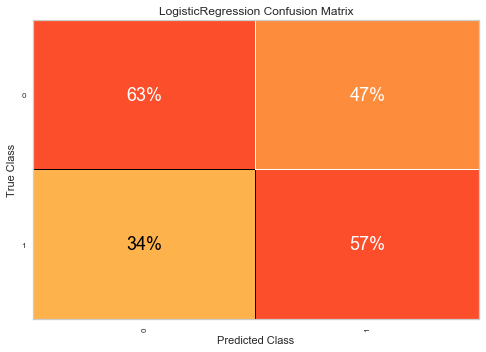

In [28]:
from yellowbrick.classifier import ConfusionMatrix

#specify model
cm = ConfusionMatrix(logregcv)

#sklearn fit
cm.fit(X_train, y_train)

#results
cm.score(X_test, y_test)

#boost size of font
#yellowbrick works in pandas, so you can adjust settings before showing
for label in cm.ax.texts:
    label.set_size(18)

cm.poof()

#NLTK also a confusion matrix implementation
#import nltk
#print(nltk.ConfusionMatrix( y_test, y_hat_test))

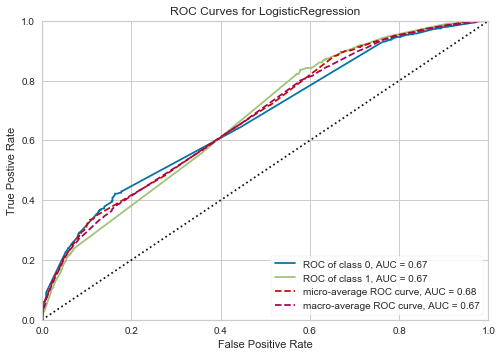

In [29]:
from yellowbrick.classifier import ROCAUC

#Yellowbrick works by fitting 

visualizer = ROCAUC(logregcv)

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)
visualizer.poof()   

### Naive Bayes

http://scikit-learn.org/stable/modules/naive_bayes.html

$$P(y\ |\ X) = \frac{P(X \ | \ y)P(y)}{P(X)}$$

where $P(X) = P(X \ | ~y)P(~y)$

$$\text{Posterior probability} = \frac{(\text{Likelihood})(\text{Prior probability})}{\text{(Evidence)}}$$

The likelihood of outcome y given evidence X is a function of the probability that the evidence X occured given that y is true and the probability that y is true regardless of evidence, over the probability that X evidence exists.

A concrete example Bart used: truly having cancer is a function of not only having a positive test result for cancer, but also one must account for the actual rarity of having cancer, i.e.

- P(A\ |\ B) -- the probabiity of having cancer (A) given a positive finding test result (B)
- P(B\ |\ A) -- chance of a positive test (B) given that you do actually have cancer (A).
- P(A) -- Chance of having cancer (regardless of test results).
- P(~ A) -- Chance of not having cancer in the abstract.
- P(B) = P(~ A)P(B\ | ~A) -- Chance of a false positive, i.e. you get a positive test and do not have cancer.

#### The naive part:

If we assume independence amongst our observations -- same as our regression assumption of independence -- (i.e. $P(\ x_i | y,x_1,...,x_{i+1},x_{i+1},...,x_n) = P(\ x_i|y)$ then the we can restate the probability of y, our classification outcome, as proportional to the sum of the probabilities for each $x_i$:

$$P( x_i,...,x_n) \propto \prod^n_{i=1} P(x_i)$$ 

i.e. think of a 100 random coin flips. The odds of any one coin being H does not affect the probability of any other coin being heads. They are all independent.

#### So, what's the computer gonna do?

It's going to maximize that probability (find the max of the function given by):

$$\hat{y} = \underset{y}{\operatorname{argmax}} P(y) \prod^n_{i=1}P(x_i\ |\ y)$$

In somewhat plain english: we wish to maximize the probability of being in class y given the presence/absence of word $x_i$, $P(x_i\ |\ y)$ given the frequency of class y in the sample.

The computer is going to learn from the training data what it expects a given category to be based on the distribution of $x_i...x_n$ words, and then will calculate the product of a given category -- y -- based on the likelihood of observing all those words (analgous to 'Given that I have observed a 100 Hs, is this a fair coin?)

In [30]:
#import 
from sklearn.naive_bayes import BernoulliNB 
from sklearn.naive_bayes import MultinomialNB #Categorical, "performs better on large datasets"

#fit
nb_model = MultinomialNB()
nb_model.fit(X_train,y_train)

#predict
y_hat_test = nb_model.predict(X_test)
y_hat_train = nb_model.predict(X_train)

In [31]:
#accuracy scores: tne percentage of labels correctly predicted
print("Train accuracy: ", metrics.accuracy_score(y_train, y_hat_train))
print("Test accuracy: ", metrics.accuracy_score(y_test, y_hat_test))

Train accuracy:  0.6011332840601133
Test accuracy:  0.625


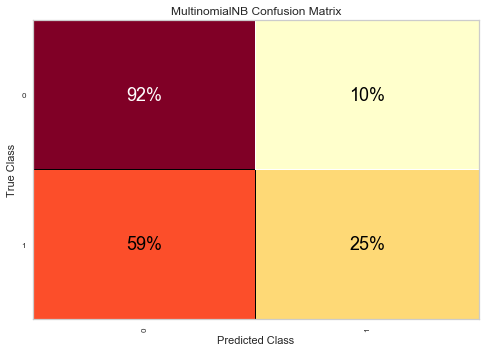

In [32]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(nb_model)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

for label in cm.ax.texts:
    label.set_size(18)

cm.poof()

#NLTK also has an implementation
#import nltk
#print(nltk.ConfusionMatrix( y_test, y_hat_test))

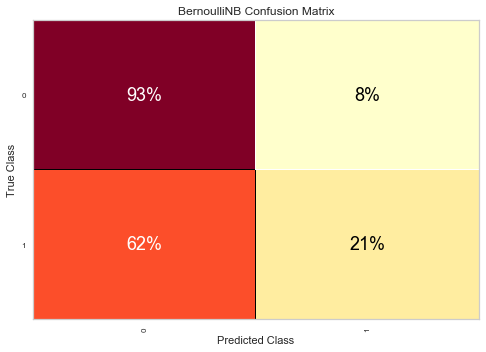

In [33]:
#Let's use BernoulliNB

nb_model = BernoulliNB()

cm = ConfusionMatrix(nb_model)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

for label in cm.ax.texts:
    label.set_size(18)

cm.poof()


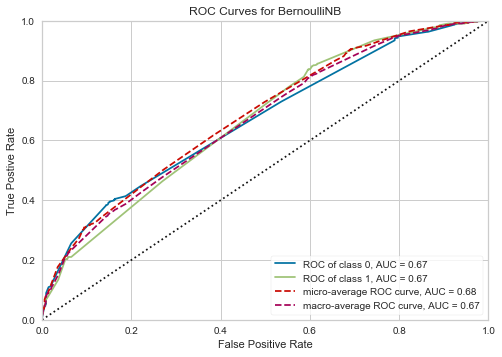

In [34]:
rocauc_viz = ROCAUC(nb_model)

rocauc_viz.fit(X_train, y_train)  
rocauc_viz.score(X_test, y_test)
rocauc_viz.poof()   

### Support Vector Machine (SVM)

http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html


- Intuition is fairly straight forward geometrically, if we have linearly separated data, we wish to draw a hyperplane that divides these two data.

<img src="images/svm1.png" style="width: 400px;" />

<img src="images/svm2.png" style="width: 400px;" />

- We face an overfitting trade-off: if we try to account for every data point, then our model will not perform well on our test data. 

<img src="images/reg_tradeoff.png" style="width: 400px;" />

- The essence of the kernel trick that Bart described is that if our data is not linearly separated, we can try to transform it into another set of dimensions to try to fit the data.

<img src="images/kernel_trick.png" style="width: 400px;" />

- `rbf` (Radial Basis Function) is designed to work with non-linear data, while obviously `linear` is the default designed to work with linearly separated data.

In [35]:
from sklearn.svm import SVC

#call function for suport vector classifer
#linear is the kernel trick that Bart discussed
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)

#predict
y_hat_test = svm_model.predict(X_test)
y_hat_train = svm_model.predict(X_train)

In [36]:
#accuracy scores: tne percentage of labels correctly predicted
print("Train accuracy: ", metrics.accuracy_score(y_train, y_hat_train))
print("Test accuracy: ", metrics.accuracy_score(y_test, y_hat_test))

Train accuracy:  0.5991623552599162
Test accuracy:  0.6027070063694268


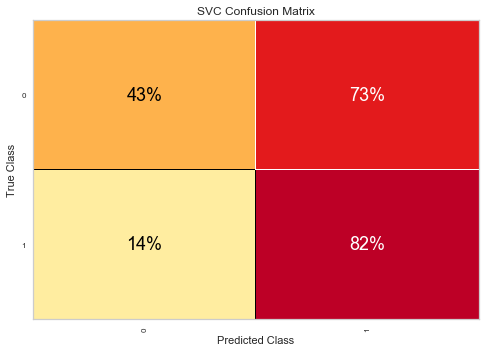

In [37]:
cm = ConfusionMatrix(svm_model)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

for label in cm.ax.texts:
    label.set_size(18)

cm.poof()

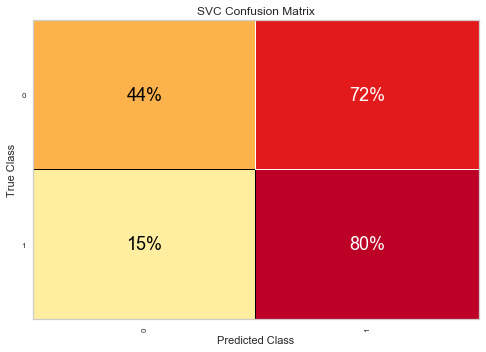

In [38]:
#Let's try the linear kernel

svm_model = SVC(kernel='linear')

cm = ConfusionMatrix(svm_model)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

for label in cm.ax.texts:
    label.set_size(18)

cm.poof()

<font color=darkgreen>

## Cross-validation and hyperparameter tuning

<img src="images/ten_fold.png" style="width: 400px;" />

- Hyperparameters are the meta level settings of each algorithm. We can specify them if we have prior theory to do so, or we can aks the machine to tune them, typically using something called gradient descent (it's typically computationally impossible to test *all* possible combinations, so what the computer does is [increment down a slope of the loss function](https://en.wikipedia.org/wiki/Gradient_descent).)
- The 'learning rate' parameter is the rate at which one descends the descent. (Typically 'C' parameter in scikit-learn)
- In 10-fold cross validation, one sample is used as the training data while the other 9 are used to train the model, and then we iterate through each fold.
- The results from each fold are then typically averaged together.
- That averaged result is then used to predict on the set aside test data.

#### Cross validation:

* Gridsearch in a dictionary of parameters and a function.
* GridSearchCV itself takes in parameters like specifying the number of folds, the loss function, and the learning rate.

#### Viz of model comparison

https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/

<font color=purple>

### Tuning Logistic Regression

In [39]:
parameters_grid = {
    "C" : [0.001, 0.01, 0.1, 1, 10, 100, 1000, 1000, 10000] 
}

In [40]:
from sklearn.model_selection import GridSearchCV

#using the L2 norm to regularize
logreg = LogisticRegression(penalty='l2')

#using auc to score; 10 cross folds, and parallel processing turned on to 4 to speed things up
gs_logreg = GridSearchCV(logreg, parameters_grid, scoring='roc_auc', cv=10,n_jobs=4)
gs_logreg.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 1000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [41]:
print("Tuned LogReg Learning Parameter:", gs_logreg.best_params_)
print("Best AUC performance:", gs_logreg.best_score_)

Tuned LogReg Learning Parameter: {'C': 0.1}
Best AUC performance: 0.6584846094379743


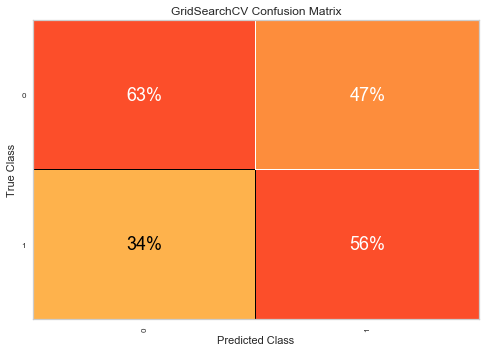

In [42]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(gs_logreg)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

for label in cm.ax.texts:
    label.set_size(18)

cm.poof()

<font color=purple>

### Tuning Naive Baye

- Alpha controls model complexity: this adds additional positive data points for each parameter, "smoothing" out any jumps

In [43]:
alpha_range = np.linspace(0.1,1,10)
param_grid = dict(alpha=alpha_range) # ,kernel=kernels

In [44]:
from sklearn.naive_bayes import MultinomialNB

gs_nb = GridSearchCV(MultinomialNB(), param_grid=param_grid,cv=10,n_jobs=4)
gs_nb.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [45]:
print("Tuned LogReg Learning Parameter:", gs_nb.best_params_)
print("Best AUC performance:", gs_nb.best_score_)

Tuned LogReg Learning Parameter: {'alpha': 0.1}
Best AUC performance: 0.597930524759793


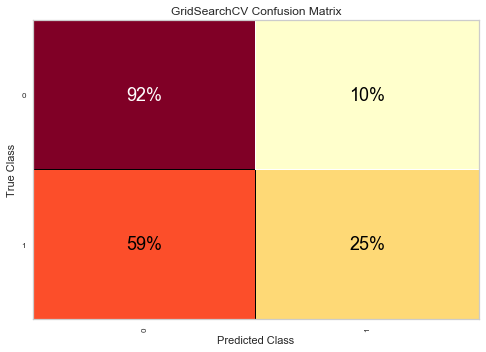

In [46]:
cm = ConfusionMatrix(gs_nb)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

for label in cm.ax.texts:
    label.set_size(18)

cm.poof()

<font color=purple>

### Tuning SVM

- Gamma is the tuning parameter to specify this: should we consider only near points or far points? A low gamma means further away points are considered.
- C is our parameter for how much error we are comfortable with. A high C attempts to train on all data points, not just ones defined by their distance to the vector.

In [47]:
g_range = 2. ** np.arange(-15, 5, step=2)
C_range = 2. ** np.arange(-5, 15, step=2)
kernels = ('linear','rbf')
param_grid = dict(gamma=g_range, C=C_range,,kernel=kernels) 

SyntaxError: invalid syntax (<ipython-input-47-97ea6c16e5de>, line 4)

In [ ]:
gs_svm = GridSearchCV(SVC(), param_grid=param_grid,cv=5,n_jobs=4)
gs_svm.fit(X_train, y_train)

In [ ]:
print("Tuned LogReg Learning Parameter:", gs_svm.best_params_)
print("Best AUC performance:", gs_svm.best_score_)

In [ ]:
cm = ConfusionMatrix(gs_svm)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

for label in cm.ax.texts:
    label.set_size(18)

cm.poof()

<font color=darkgreen>

### What did we learn?

1. Apparently there isn't much difference between these two classes?
2. We need to search a much wider set of algorithms.
3. Hopefully some intuition of what ML is trying to do.

<font color=darkgreen>

### And Beyond!

- Linear and quadratic discriminant analysis
- Bayes decision trees!
- Random forests (BDT + "aggregate bootstrapping" or "bagging")!
- Neural Networks!

Classes:

- AC209a/209b
- CS181
- Stat183
- Read Mullainathan and Spiess: https://pubs.aeaweb.org/doi/pdfplus/10.1257/jep.31.2.87